# Lectura, análisis y filtrado de eventos Forbush (FE)
### Base de datos: http://spaceweather.izmiran.ru/eng/fds2014.html

In [16]:
import pandas as pd
import matplotlib
print(matplotlib.__version__)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from augerscalerpy.scaler_cleaning import scaler_clean, plot_data
from augerscalerpy.plot_config import configure_plots

3.7.0


### Leyendo el archivo que ya está guardado

In [26]:
data = pd.read_csv('forbush_decrease_ALL_years.csv')
data['MagnM'] = data['MagnM'].apply(lambda x: x if x >= 0 else 0)
data

,date,MagnM,Axym,Azrange,TminM,DminM,OType,Bmax,Bzmin,Vmax,Dstmin
0,1957.07.05 00:42:00,3.8,1.69,3.87,10,-0.81,1,-999.0,999.0,-999.0,-92.0
1,1957.07.06 20:00:00,1.6,1.84,3.92,-2,-0.66,9,-999.0,999.0,-999.0,-45.0
2,1957.07.09 06:00:00,1.4,1.88,4.22,1,-1.07,9,-999.0,999.0,-999.0,-12.0
3,1957.07.11 10:00:00,1.5,1.77,3.45,9,-1.07,9,-999.0,999.0,-999.0,-12.0
4,1957.07.13 19:00:00,1.2,2.63,3.80,8,-0.70,9,-999.0,999.0,-999.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...
104,2020.12.19 09:00:00,0.5,1.05,0.87,11,-0.21,9,9.0,-3.3,388.0,-12.0
105,2020.12.20 23:00:00,0.6,0.86,0.92,19,-0.18,9,11.6,-6.5,407.0,-13.0
106,2020.12.22 01:00:00,0.6,0.82,0.72,6,-0.20,9,12.9,-2.4,637.0,-22.0
107,2020.12.27 04:00:00,0.5,0.59,0.52,42,-0.21,9,7.2,-3.0,552.0,-14.0


/tmp/ipykernel_5266/1225384244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'], format='%Y.%m.%d %H:%M:%S')
/tmp/ipykernel_5266/1225384244.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(date_values, MagnM_values,  c=color_values,cmap=cmap, s=20, alpha=0.8)


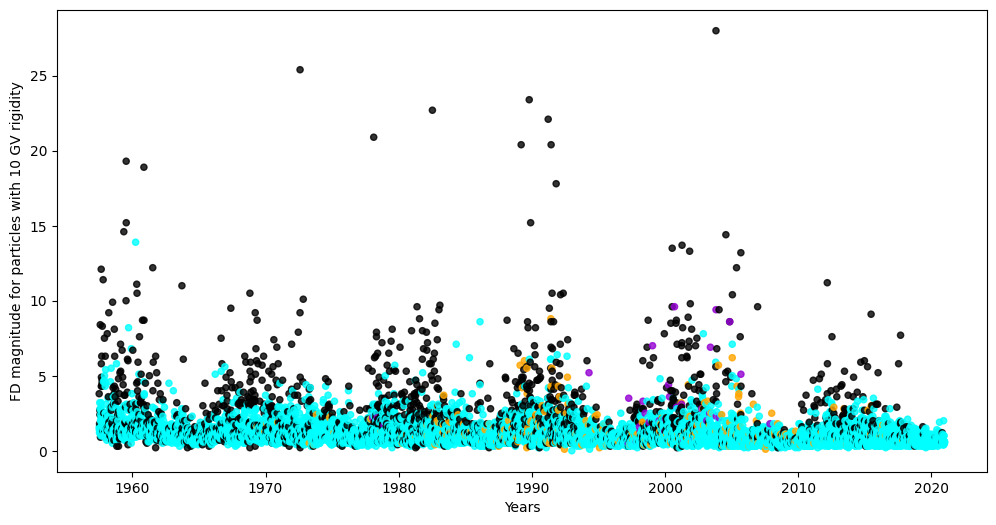

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd


# Filtrar el DataFrame para obtener solo los valores de OType 1, 3 y 9
filtered_data = data[data['OType'].isin([1, 2, 3, 9])]
filtered_data['date'] = pd.to_datetime(filtered_data['date'], format='%Y.%m.%d %H:%M:%S')

date_values = filtered_data['date'].values
date_values = pd.to_datetime(date_values)

# Calcula los años a partir de las fechas en 'date_sc'
years = date_values.year

# Extraer los valores de date, MagnM y OType
date_values = filtered_data['date']
MagnM_values = filtered_data['MagnM']
OType_values = filtered_data['OType']

# Crear una figura
plt.figure(figsize=(12, 6))

# Crear un mapa de colores discreto para OType (1, 3 y 9)
#colors = {1: 'blue', 3: 'green', 9: 'red'}
#colors = {1: 'black', 3: 'orange', 9: 'cyan'}
colors = {9: 'cyan',3: 'orange',2: 'darkviolet', 1: 'black',  }
color_values = [colors[otype] for otype in OType_values]

# Crear un mapa de colores personalizado con ListedColormap
#cmap = mcolors.ListedColormap(['blue', 'green', 'red'])
#cmap = mcolors.ListedColormap(['black', 'orange', 'cyan'])
cmap = mcolors.ListedColormap(['cyan','orange', 'darkviolet', 'black'])

# Crear un gráfico de dispersión con mapa de color
scatter = plt.scatter(date_values, MagnM_values,  c=color_values,cmap=cmap, s=20, alpha=0.8)

# Configurar etiquetas y título
plt.xlabel('Years')
plt.ylabel('FD magnitude for particles with 10 GV rigidity')
plt.title('')


# Agregar una barra de color personalizada
#cbar = plt.colorbar(scatter, cmap=cmap , ticks=[1, 3, 9])
#cbar.set_ticks([1, 3, 9])
#cbar.set_ticklabels(['1', '3', '9'])
#cbar.set_label('OType')

# Mostrar el gráfico
plt.show()


/tmp/ipykernel_5266/350489079.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'], format='%Y.%m.%d %H:%M:%S') #antes


<Figure size 1200x600 with 0 Axes>

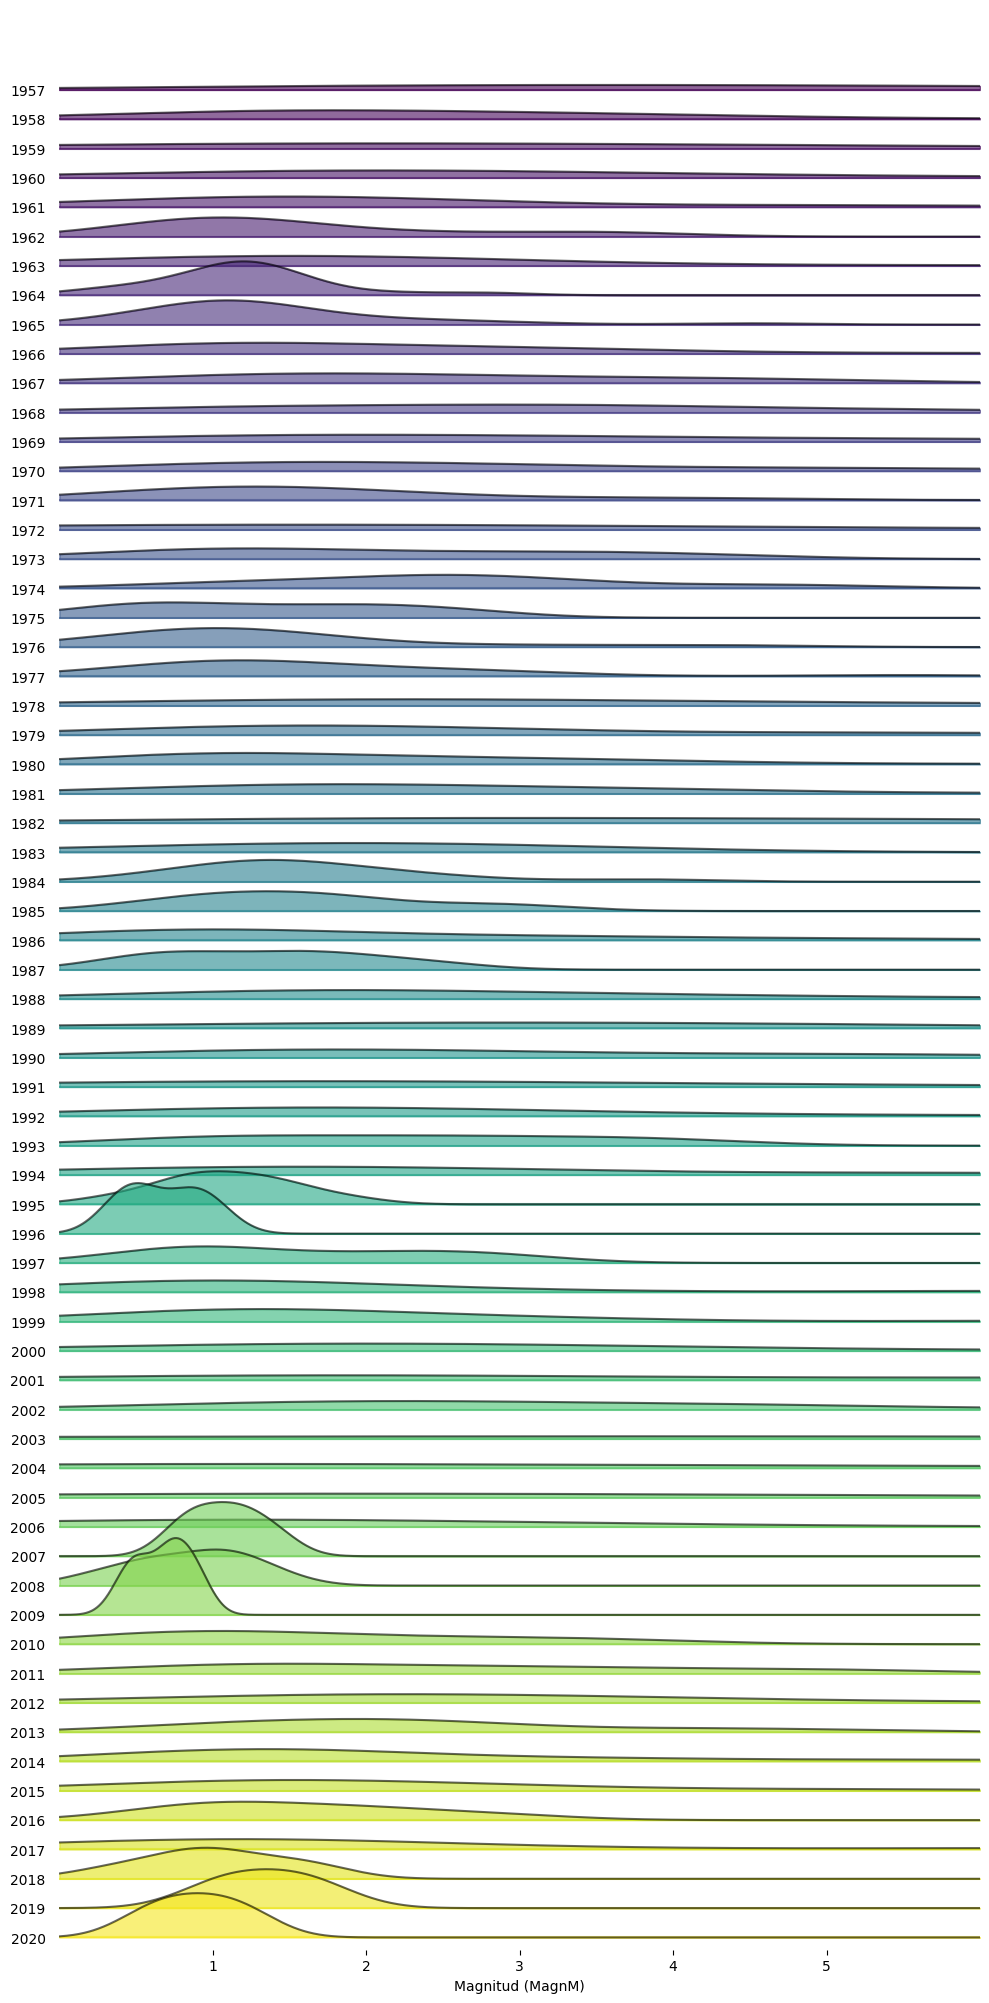

In [6]:
import pandas as pd
import joypy
from joypy import joyplot
import matplotlib.pyplot as plt
from matplotlib import cm

# Filtrar el DataFrame para obtener solo los valores de OType 1, 2, 3 y 9
filtered_data = data[data['OType'].isin([1])]
filtered_data['date'] = pd.to_datetime(filtered_data['date'], format='%Y.%m.%d %H:%M:%S') #antes
#filtered_data.loc[:, 'date'] = pd.to_datetime(filtered_data['date'], format='%Y.%m.%d %H:%M:%S') #ahora

# Duplicar las filas para aumentar el espaciado vertical
#filtered_data = pd.concat([filtered_data] * 5, ignore_index=True)


# Crear una figura
plt.figure(figsize=(12, 6))

# Crear un Ridgeline Plot
joyplot(
    data=filtered_data, 
    by=filtered_data['date'].dt.year,  # Agrupa por el año de la columna 'date'
    #by=(filtered_data['date'].dt.year // 2) * 2,  # Agrupa por intervalos de 2 años
    column='MagnM',     # La columna de magnitud
    figsize=(10, 20),    # Tamaño de la figura
    colormap=cm.viridis,  # Mapa de colores
    #colormap=palette,  # Utiliza la paleta de colores
    #color=filtered_data['OType_Color'],  # Utiliza los colores asignados
    x_range=(0, 6),     # Establece el rango en el eje x
    alpha=0.6,          # Transparencia
    overlap=1  # Ajusta el valor de superposición
)


# Configurar etiquetas y título
plt.xlabel('Magnitud (MagnM)')
plt.ylabel('Año')
plt.title('')


# Mostrar el gráfico
plt.show()


/tmp/ipykernel_5266/1807723220.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'], format='%Y.%m.%d %H:%M:%S')
/tmp/ipykernel_5266/1807723220.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'year'] = filtered_data['date'].dt.year


<Figure size 2000x800 with 0 Axes>

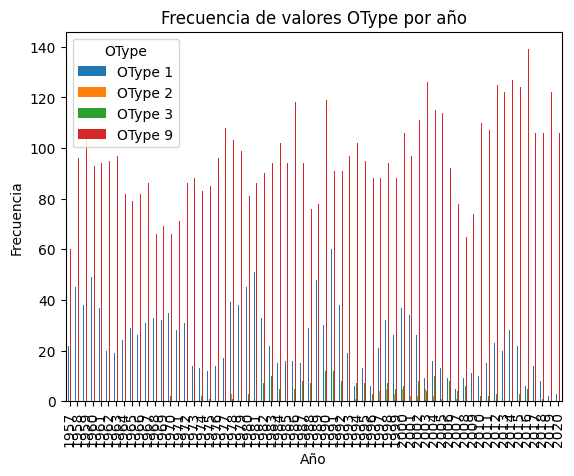

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener solo los valores de OType 1, 2, 3 y 9
filtered_data = data[data['OType'].isin([1, 2, 3, 9])]

# Crear una figura con un tamaño más grande
plt.figure(figsize=(20, 8))

filtered_data['date'] = pd.to_datetime(filtered_data['date'], format='%Y.%m.%d %H:%M:%S')
filtered_data.loc[:, 'year'] = filtered_data['date'].dt.year

# Agrupar los datos por año y contar la frecuencia de cada valor de OType
grouped = filtered_data.groupby(['year', 'OType']).size().unstack(fill_value=0)
# Crear un gráfico de barras apiladas
grouped.plot(kind='bar', stacked=False)

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de valores OType por año')

# Mostrar el gráfico
plt.legend(title='OType', labels=['OType 1', 'OType 2', 'OType 3', 'OType 9'])
plt.show()


/home/jennifer/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jennifer/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jennifer/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jennifer/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

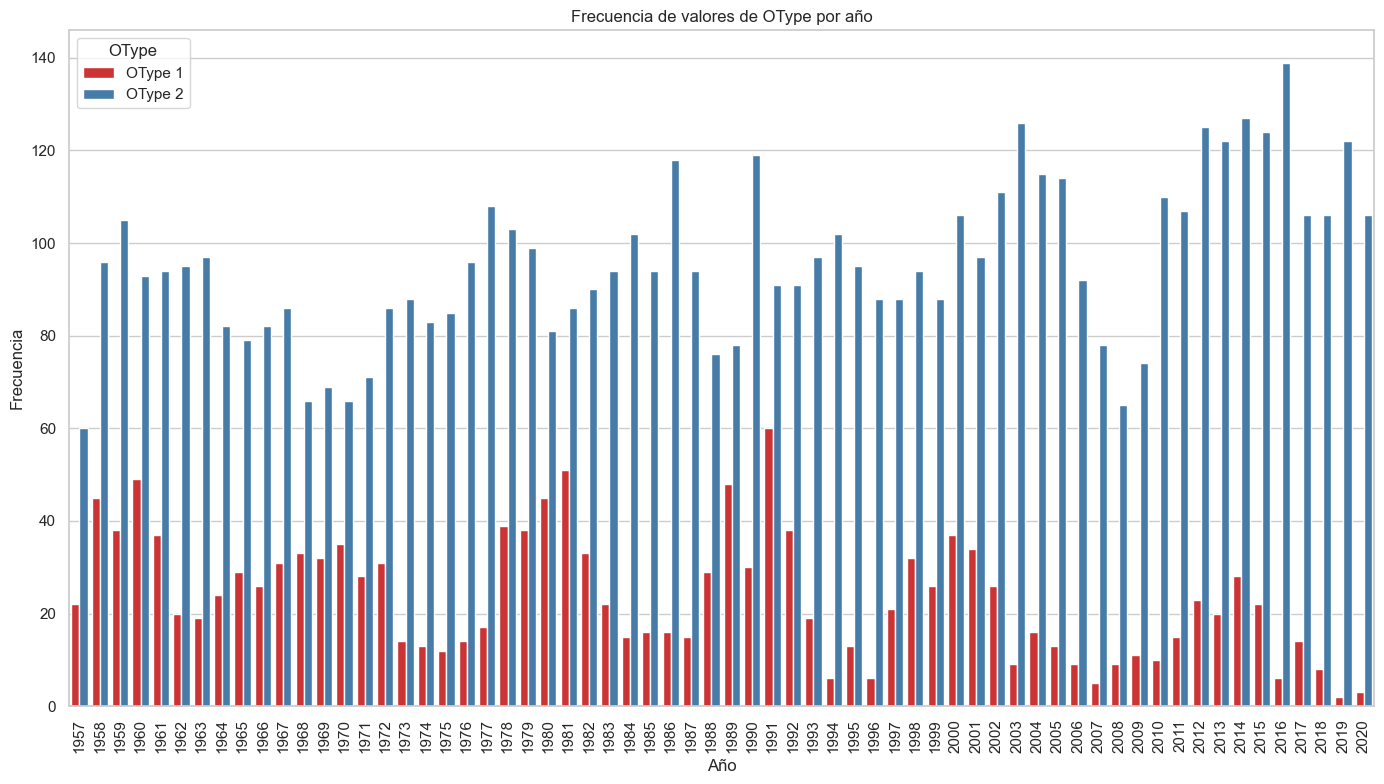

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data['date'] = pd.to_datetime(data['date'], format='%Y.%m.%d %H:%M:%S')

# Filtrar el DataFrame para obtener los valores de OType 1, 2, 3 y 9 desde el año 2000 en adelante
#filtered_data = data[(data['OType'].isin([1, 2, 3, 9])) & (data['date'].dt.year >= 2000)]
#filtered_data = data[data['OType'].isin([1, 2, 3, 9])]
filtered_data = data[data['OType'].isin([1,2,3,9])]
# Crear una figura con un tamaño adecuado

# Ordenar los datos por año y OType
filtered_data = filtered_data.sort_values(by=['date', 'OType'])


plt.figure(figsize=(14, 8))

#
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

#Definir una paleta de colores personalizada
custom_palette = sns.color_palette("Set1")

# Crear un gráfico de barras utilizando Seaborn
#sns.countplot(data=filtered_data, x='date', hue='OType', palette="Set1")
#sns.countplot(data=filtered_data, x=filtered_data['date'].dt.year, hue='OType', palette="Set1")
# Crear un gráfico de barras utilizando Seaborn
sns.countplot(data=filtered_data, x=filtered_data['date'].dt.year, hue='OType', palette=custom_palette)
#ax = sns.countplot(data=filtered_data, x=filtered_data['date'].dt.year, hue='OType', palette=custom_palette)
#ax2 = ax.twinx()
#sns.lineplot(data=filtered_data, x=filtered_data['date'].dt.year, y=filtered_data['MagnM'], ax=ax2, color='r')

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Frecuencia')
#ax.set_ylabel('Frecuencia')
#ax2.set_ylabel('Magnitud (MagnM)')
plt.title('Frecuencia de valores de OType por año')

# Rotar etiquetas en el eje X para una mejor legibilidad
plt.xticks(rotation=90)

# Limitar el eje X para mostrar solo los años desde 2000
#plt.xlim(pd.to_datetime('2000-01-01'), pd.to_datetime('2023-12-31'))

# Mostrar el gráfico
plt.legend(title='OType', labels=['OType 1', 'OType 2', 'OType 3'])
plt.tight_layout()
plt.show()


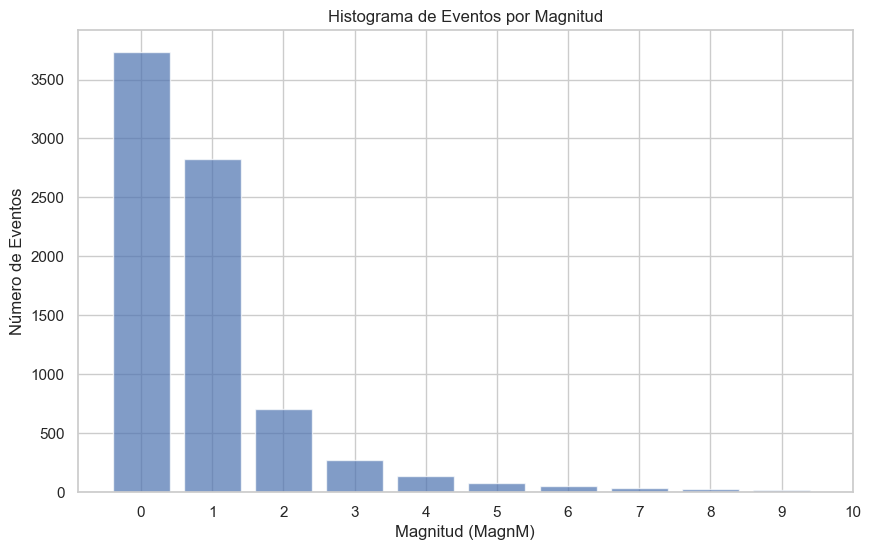

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener solo los valores de OType 1, 2, 3 y 9
filtered_data = data[data['OType'].isin([1, 2, 3, 9])]

# Crear una figura con un tamaño adecuado
plt.figure(figsize=(10, 6))

# Crear un histograma de eventos en función de la magnitud
plt.hist(filtered_data['MagnM'], bins=range(11), rwidth=0.8, alpha=0.7, color='b', align='left')

# Configurar etiquetas y título
plt.xlabel('Magnitud (MagnM)')
plt.ylabel('Número de Eventos')
plt.title('Histograma de Eventos por Magnitud')

# Definir etiquetas para los bines de magnitud
plt.xticks(range(11))

# Mostrar el histograma
plt.show()


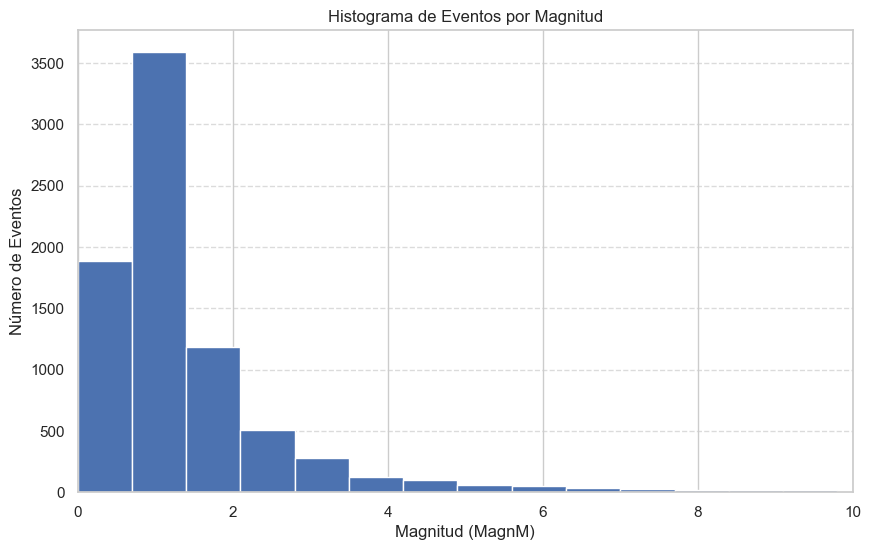

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener solo los valores de OType 1, 2, 3 y 9
filtered_data = data[data['OType'].isin([1, 2, 3, 9])]

# Crear una figura con un tamaño adecuado
plt.figure(figsize=(10, 6))

# Crear un histograma de eventos en función de la magnitud con bines de ancho 0.5
#plt.hist(filtered_data['MagnM'], bins=30, rwidth=0.8, alpha=0.7, color='b', align='left')
plt.hist(filtered_data['MagnM'], bins=40)

# Configurar etiquetas y título
plt.xlabel('Magnitud (MagnM)')
plt.ylabel('Número de Eventos')
plt.title('Histograma de Eventos por Magnitud')

# Definir límites para los bines de magnitud
plt.xlim(0, 10)

# Agregar una cuadrícula de fondo para mejorar la estética
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el histograma
plt.show()


In [27]:
filtered_data = data[data['OType'] == 1]
filtered_data

,date,MagnM,Axym,Azrange,TminM,DminM,OType,Bmax,Bzmin,Vmax,Dstmin
0,1957.07.05 00:42:00,3.8,1.69,3.87,10,-0.81,1,-999.0,999.0,-999.0,-92.0
5,1957.07.16 07:12:00,1.8,1.95,4.67,26,-0.78,1,-999.0,999.0,-999.0,-26.0
8,1957.07.22 04:18:00,2.7,4.39,4.47,3,-1.30,1,-999.0,999.0,-999.0,-30.0
10,1957.07.27 20:00:00,2.4,2.33,5.04,11,-0.82,1,-999.0,999.0,-999.0,21.0
13,1957.08.03 15:54:00,8.4,2.60,3.15,57,-0.58,1,-999.0,999.0,-999.0,-39.0
...,...,...,...,...,...,...,...,...,...,...,...
38,2019.05.10 17:54:00,1.6,0.99,0.75,26,-0.28,1,11.9,-10.5,382.0,NaN
44,2019.05.26 22:14:00,1.1,0.94,1.08,14,-0.29,1,11.8,-6.3,372.0,-16.0
38,2020.04.20 02:33:00,0.9,0.96,0.74,10,-0.34,1,15.9,-14.3,371.0,-59.0
84,2020.10.19 14:41:00,0.6,0.62,0.93,12,-0.19,1,9.1,-3.0,419.0,-13.0


In [29]:
filtered_data.loc[54]['date']

54    1958.06.08 17:24:00
54    1965.07.06 04:54:00
54    1970.07.08 23:17:00
54    1972.06.17 13:12:00
54    1975.07.06 17:21:00
54    1981.05.17 23:02:00
54    1988.06.29 04:29:00
54    1992.05.18 20:21:00
54    1993.05.26 23:00:00
54    1997.06.08 16:36:00
54    1999.06.28 05:11:00
54    2006.07.09 21:36:00
Name: date, dtype: object

In [30]:
# Importar la biblioteca datetime
from datetime import datetime

# Función para convertir la fecha
def convert_date_to_continuous_number(date_str):
    # Convertir la fecha en un objeto datetime
    date_obj = datetime.strptime(date_str, '%Y.%m.%d %H:%M:%S')
    
    # Construir un número continuo a partir de la fecha
    continuous_number = int(date_obj.strftime('%Y%m%d%H%M'))
    
    return continuous_number

# Aplicar la función a la columna 'date' en filtered_data
filtered_data['continuous_date'] = filtered_data['date'].apply(convert_date_to_continuous_number)

# Verificar los resultados
print(filtered_data)


                   date  MagnM  Axym  Azrange  TminM  DminM  OType   Bmax  \
0   1957.07.05 00:42:00    3.8  1.69     3.87     10  -0.81      1 -999.0   
5   1957.07.16 07:12:00    1.8  1.95     4.67     26  -0.78      1 -999.0   
8   1957.07.22 04:18:00    2.7  4.39     4.47      3  -1.30      1 -999.0   
10  1957.07.27 20:00:00    2.4  2.33     5.04     11  -0.82      1 -999.0   
13  1957.08.03 15:54:00    8.4  2.60     3.15     57  -0.58      1 -999.0   
..                  ...    ...   ...      ...    ...    ...    ...    ...   
38  2019.05.10 17:54:00    1.6  0.99     0.75     26  -0.28      1   11.9   
44  2019.05.26 22:14:00    1.1  0.94     1.08     14  -0.29      1   11.8   
38  2020.04.20 02:33:00    0.9  0.96     0.74     10  -0.34      1   15.9   
84  2020.10.19 14:41:00    0.6  0.62     0.93     12  -0.19      1    9.1   
86  2020.10.23 13:20:00    1.2  0.82     0.63     52  -0.34      1   13.3   

    Bzmin   Vmax  Dstmin  continuous_date  
0   999.0 -999.0   -92.0     19

/tmp/ipykernel_5266/409621421.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['continuous_date'] = filtered_data['date'].apply(convert_date_to_continuous_number)


In [31]:
filtered_data['continuous_date'].iloc[0]

195707050042

In [32]:
import pandas as pd
import requests

# Descargar los datos de la URL
url = 'http://spaceweather.izmiran.ru/dbs/fds/events/200601151400.txt'
response = requests.get(url)

# Verificar que la descarga fue exitosa
if response.status_code == 200:
    # Obtener el contenido de la respuesta
    content = response.content.decode('utf-8')
    
    # Dividir el contenido en líneas y seleccionar la primera columna
    lines = content.split('\n')
    first_column = [line.split()[0] for line in lines if line.strip()]
    
    # Crear un nuevo DataFrame con la primera columna como nombres de las columnas
    data_extended = pd.DataFrame(columns=first_column)

    # Mostrar las primeras filas del nuevo DataFrame
    print(data_extended.head())
else:
    print("Error al descargar los datos.")



Empty DataFrame
Columns: [Date, Time, Otype, Sdate, Stime, Stype, Source, Qs, Vsp, Vmean, VmeanC, Vmax, tVmax, Bmax, tBmax, VmBm, Bzmin, ABzmax, BzmtoBm, KTmax, tKTmax, KTmin, tKTmin, Bemax, tBemax, Bemin, tBemin, Rbulk, B2Sum, Magn, MagnM, MagnL, MagnC, Tmin, TminM, Dmin, tDmin, DminM, tDminM, GrDmin, Dmax, tDmax, AftoB, GammaM, GammaD, tBef, tAft, tFrom, Kpmax, Apmax, Dstmin, tDstmin, Fdata, Xmagn, Hlat, Alat, Hlon, Sdur, Axym, Txymax, Axm, Aym, Azrange, Pxym, Axdm, Aydm, Azdm, Axydm, Pxydm, D01, D02, AD02, AxytoAf, Axb, Ayb, Azb, Axyb, Pxyb, Ax0, Ay0, Az0, Axy0, Pxy0, Ax1, Ay1, Az1, Axy1, Pxy1, dx1b, dy1b, dz1b, dxy1b, dA11b, dz1b, Adz1b, dPxy1b, Pdxy1b, DP1b, CMEdate, CMEtime, ...]
Index: []

[0 rows x 113 columns]


In [33]:
data_extended

,Date,Time,Otype,Sdate,Stime,Stype,Source,Qs,Vsp,Vmean,...,MCstarttime,MCdur,RMC,EruptA,EruptD,EruptAD,Ind,Spol,GLE,SSN


In [40]:
data_extended = pd.read_csv('FD_type1_EXTENDED_ALL_years.csv')
#data['MagnM'] = data['MagnM'].apply(lambda x: x if x >= 0 else 0)
data_extended

,Unnamed: 0,Date,Time,Otype,Sdate,Stime,Stype,Source,Qs,Vsp,...,MCstarttime,MCdur,RMC,EruptA,EruptD,EruptAD,Ind,Spol,GLE,SSN
0,0,1957-07-05,0:42:00,1,NaN,NaN,-1.0,NaN,NaN,NaN,...,NaN,-1.0,NaN,NaN,NaN,NaN,0.0,NaN,0,302.0
1,1,1957-07-16,7:12:00,1,NaN,NaN,-1.0,NaN,NaN,NaN,...,NaN,-1.0,NaN,NaN,NaN,NaN,0.0,NaN,0,261.0
2,2,1957-07-22,4:18:00,1,NaN,NaN,-1.0,NaN,NaN,NaN,...,NaN,-1.0,NaN,NaN,NaN,NaN,0.0,NaN,0,361.0
3,3,1957-07-27,20:00:00,1,NaN,NaN,-1.0,NaN,NaN,NaN,...,NaN,-1.0,NaN,NaN,NaN,NaN,0.0,NaN,0,245.0
4,4,1957-08-03,15:54:00,1,NaN,NaN,-1.0,NaN,NaN,NaN,...,NaN,-1.0,NaN,NaN,NaN,NaN,0.0,NaN,0,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,1502,2019-05-10,17:54:00,1,NaN,NaN,NaN,DSF,NaN,NaN,...,8:00:00,47.0,14.12,NaN,NaN,NaN,NaN,NaN,0,NaN
1503,1503,2019-05-26,22:14:00,1,NaN,NaN,NaN,DSF,NaN,NaN,...,4:00:00,20.0,8.09,NaN,NaN,NaN,93.0,NaN,0,NaN
1504,1504,2020-04-20,2:33:00,1,NaN,NaN,NaN,DSF,NaN,NaN,...,8:00:00,20.0,11.26,NaN,NaN,NaN,NaN,NaN,0,NaN
1505,1505,2020-10-19,14:41:00,1,NaN,NaN,NaN,?+CH975,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [41]:
data_Qs = data_extended[(data_extended['Qs'] == 4) | (data_extended['Qs'] == 5)]
data_Qs

,Unnamed: 0,Date,Time,Otype,Sdate,Stime,Stype,Source,Qs,Vsp,...,MCstarttime,MCdur,RMC,EruptA,EruptD,EruptAD,Ind,Spol,GLE,SSN
542,542,1976-04-01,2:54:00,1,1976-03-28,19:12:00,-1.0,NaN,4.0,NaN,...,NaN,-1.0,NaN,NaN,NaN,NaN,-5.0,NaN,0,33.0
1108,1108,1997-01-10,1:04:00,1,1997-01-06,14:50:00,2.0,DSF+CH,4.0,232.0,...,4:00:00,22.0,15.23,NaN,NaN,NaN,91.0,NaN,0,12.0
1110,1110,1997-02-09,13:21:00,1,NaN,NaN,2.0,DSF,5.0,584.0,...,2:00:00,17.0,6.69,23.5,10.3,33.8,77.0,NaN,0,12.0
1115,1115,1997-05-15,1:59:00,1,1997-05-12,4:42:00,1.0,SF+DSF?,4.0,749.0,...,9:00:00,15.0,16.27,19.7,75.2,94.9,77.0,NaN,0,15.0
1117,1117,1997-05-26,9:57:00,1,1997-05-21,20:03:00,1.0,SF+?,5.0,0.0,...,16:00:00,27.0,10.07,NaN,NaN,NaN,77.0,NaN,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,1492,2017-11-27,14:42:00,1,NaN,NaN,8.0,CH838_C34_1,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1493,1493,2017-12-04,16:13:00,1,NaN,NaN,8.0,CH839_C34,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1494,1494,2018-01-08,6:48:00,1,NaN,NaN,7.0,CH845+DSF,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1495,1495,2018-02-15,8:35:00,1,2018-02-12,0:15:00,1.5,SF(DSF)+CH851+CH852?,4.0,0.0,...,7:00:00,13.0,6.59,NaN,NaN,NaN,NaN,NaN,0,NaN


In [43]:
data_Qs['date'] = pd.to_datetime(data_Qs['Date'] + ' ' + data_Qs['Time'])

/tmp/ipykernel_5266/3967807409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Qs['date'] = pd.to_datetime(data_Qs['Date'] + ' ' + data_Qs['Time'])


In [44]:
# Filtrar los datos entre los años 2006 y 2021
start_year = 2006
end_year = 2021

forbush_auger = data_Qs[(data_Qs['date'].dt.year >= start_year) & (data_Qs['date'].dt.year <= end_year)]
forbush_auger

,Unnamed: 0,Date,Time,Otype,Sdate,Stime,Stype,Source,Qs,Vsp,...,MCdur,RMC,EruptA,EruptD,EruptAD,Ind,Spol,GLE,SSN,date
1322,1322,2006-07-09,21:36:00,1,2006-07-06,8:13:00,1.0,SF+CH,4.0,1043.0,...,-1.0,NaN,33.9,56.6,90.5,93.0,NaN,0,31.0,2006-07-09 21:36:00
1323,1323,2006-07-27,13:53:00,1,NaN,NaN,8.0,CHC24_233,4.0,NaN,...,-1.0,NaN,NaN,NaN,NaN,0.0,1.0,0,18.0,2006-07-27 13:53:00
1324,1324,2006-08-07,0:35:00,1,NaN,NaN,8.0,CHC34_235,4.0,NaN,...,-1.0,NaN,NaN,NaN,NaN,0.0,1.0,0,0.0,2006-08-07 00:35:00
1327,1327,2006-12-08,4:35:00,1,2006-12-06,18:29:00,1.0,SF+CH,4.0,-999.0,...,-1.0,NaN,NaN,NaN,NaN,94.0,NaN,0,28.0,2006-12-08 04:35:00
1328,1328,2006-12-14,14:14:00,1,2006-12-13,2:14:00,1.0,SF,5.0,2184.0,...,22.0,21.16,155.7,66.5,222.3,77.0,NaN,92,23.0,2006-12-14 14:14:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,1492,2017-11-27,14:42:00,1,NaN,NaN,8.0,CH838_C34_1,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2017-11-27 14:42:00
1493,1493,2017-12-04,16:13:00,1,NaN,NaN,8.0,CH839_C34,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2017-12-04 16:13:00
1494,1494,2018-01-08,6:48:00,1,NaN,NaN,7.0,CH845+DSF,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2018-01-08 06:48:00
1495,1495,2018-02-15,8:35:00,1,2018-02-12,0:15:00,1.5,SF(DSF)+CH851+CH852?,4.0,0.0,...,13.0,6.59,NaN,NaN,NaN,NaN,NaN,0,NaN,2018-02-15 08:35:00


# COMPARACIÓN CRI AUGER VS FORBUSH TIPO 1 VALIDADOS

In [17]:
auger = scaler_clean('scaler_datasets/scaler_300s_FINAL.csv')

In [18]:
auger.set_index('Date', inplace=True)
# Resample a un valor diario y calcula el promedio
auger = auger.resample('1D').mean()
# Reinicia el índice para que 'Date' vuelva a ser una columna
#auger.reset_index(inplace=True)

In [21]:
forbush_auger = pd.read_csv('forbush_events/FD_type1_PIERRE_AUGER_2006-2021.csv')
forbush_auger = forbush_auger[['date', 'MagnM','Otype','Qs']]
forbush_auger.set_index('date', inplace=True)

In [22]:
# Normalizar los datos por el promedio
auger_normalized = auger / auger.mean()
forbush_auger_normalized = forbush_auger / forbush_auger.mean()

In [23]:
promedio_DF = forbush_auger['MagnM'].mean()
promedio_DF

2.300675675675676

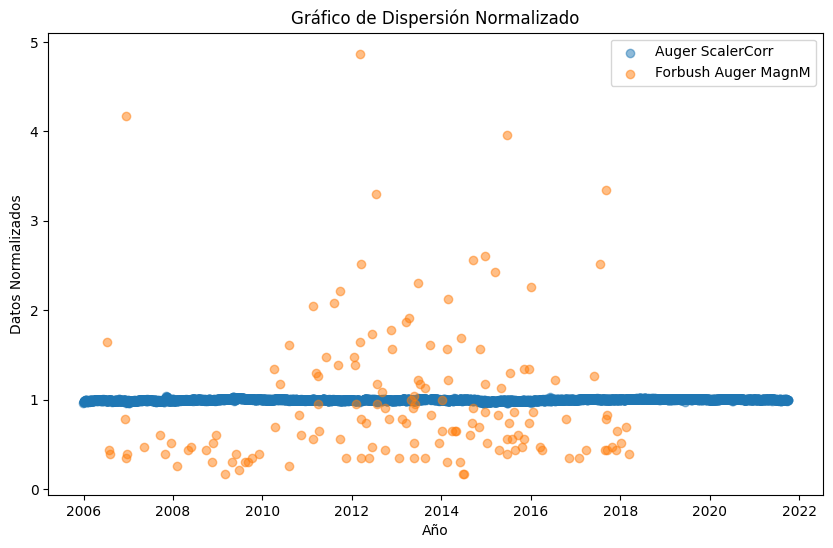

In [24]:
# Crear un gráfico de dispersión con dos ejes y
plt.figure(figsize=(10, 6))
############
scaler = auger_normalized['ScalerCorr'].values
FD = forbush_auger_normalized['MagnM'].values
# Convierte las cadenas de texto en objetos de fecha y hora de Pandas
auger_normalized.reset_index(inplace=True)
forbush_auger_normalized.reset_index(inplace=True)
date_auger_CRI = auger_normalized['Date'].values
date_auger_FD = forbush_auger_normalized['date'].values


date_auger_CRI = pd.to_datetime(date_auger_CRI)
date_auger_FD = pd.to_datetime(date_auger_FD)

# Calcula los años a partir de las fechas en 'date_sc'
yearsCRI = date_auger_CRI.year
yearsFD = date_auger_FD.year


############
# Gráfico de dispersión para 'ScalerCorr'
plt.scatter(date_auger_CRI, scaler, label='Auger ScalerCorr', alpha=0.5)

# Gráfico de dispersión para 'MagnM'
plt.scatter(date_auger_FD, FD, label='Forbush Auger MagnM', alpha=0.5)

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Datos Normalizados')
plt.title('Gráfico de Dispersión Normalizado')

# Mostrar una leyenda para distinguir entre los dos conjuntos de datos
plt.legend()

# Mostrar el gráfico
plt.show()

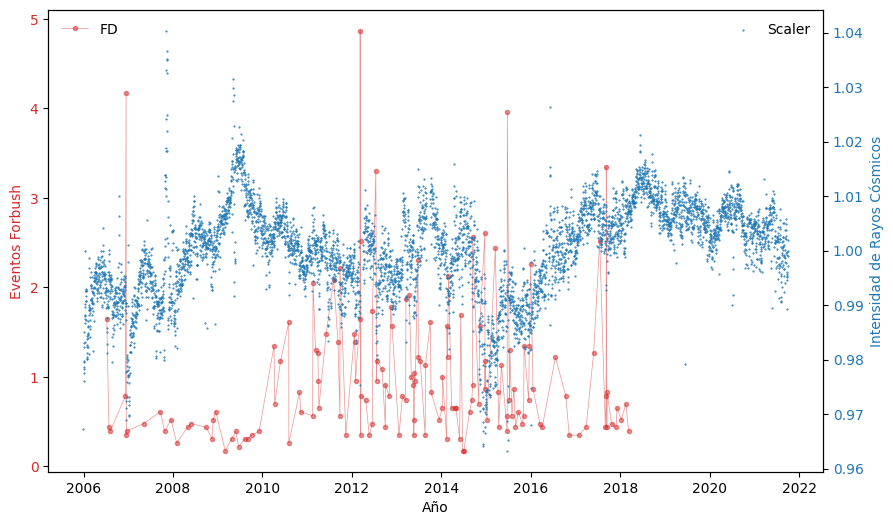

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

############################################################# GRÁFICA 1
#
# Crear una figura
fig, ax1 = plt.subplots(figsize=(10, 6))

# Configurar el primer eje Y (izquierdo)
color = 'tab:red'
ax1.set_xlabel('Año')
ax1.set_ylabel('Eventos Forbush', color=color)
ax1.plot(date_auger_FD, FD, color=color, marker='.', label='FD', linewidth=0.5, alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)

############################################################# GRÁFICA 2
# Crear un segundo eje Y (derecho)
ax2 = ax1.twinx()

# Configurar el segundo eje Y (derecho)
color = 'tab:blue'
ax2.set_ylabel('Intensidad de Rayos Cósmicos', color=color)
ax2.scatter(date_auger_CRI, scaler, color=color, marker='.', label='Scaler',s=1)
ax2.tick_params(axis='y', labelcolor=color)

# Configurar etiquetas y título
plt.title('')

# Agregar leyendas
ax1.legend(loc='upper left', frameon=False)
ax2.legend(loc='upper right', frameon=False)

# Mostrar el gráfico
plt.show()


ValueError: not enough values to unpack (expected 2, got 1)

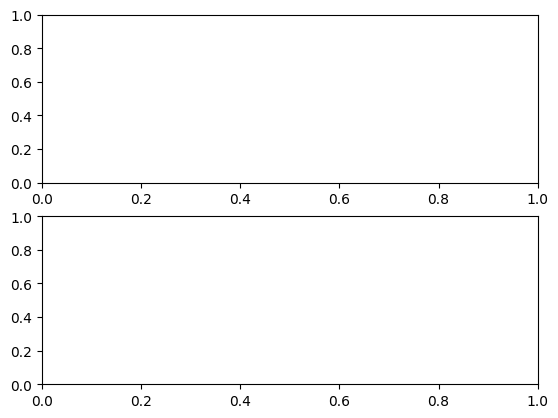

In [15]:
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]

# A low hump with a spike coming out of the top.  Needs to have
# z/colour axis on a log scale, so we see both hump and spike.
# A linear scale only shows the spike.

Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
Z = Z1 + 50 * Z2

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r', shading='nearest')
fig.colorbar(pcm, ax=ax[0], extend='max')

pcm = ax[1].pcolor(X, Y, Z, cmap='PuBu_r', shading='nearest')
fig.colorbar(pcm, ax=ax[1], extend='max')


IndexError: index 2 is out of bounds for axis 0 with size 2

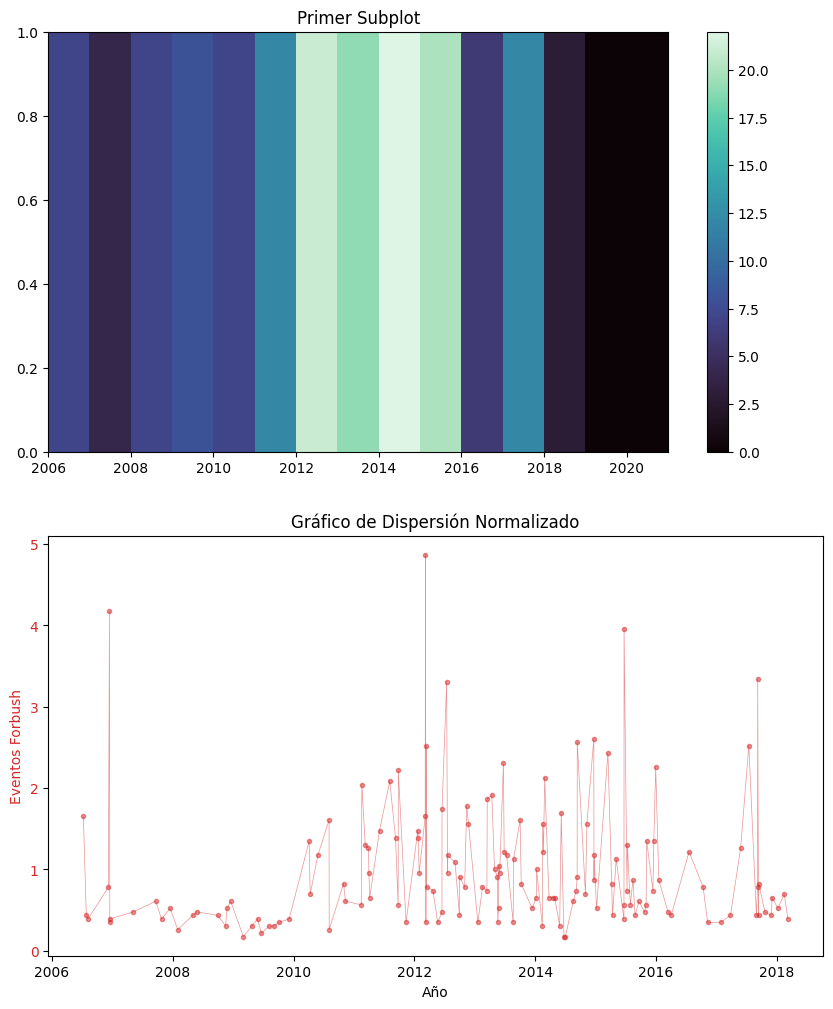

In [27]:
import matplotlib.pyplot as plt


yearsFD = date_auger_FD.year #check
# Calcula la densidad de eventos por año
density_data, xedges = np.histogram(yearsFD, bins=range(2006, 2022))#check
density_data = density_data.reshape(1, -1)#check

cmap = plt.get_cmap('mako')  # Puedes cambiar 'viridis' por otro colormap de tu elección
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # 3 filas, 1 columna
ax_heatmap = axes[0]
im = ax_heatmap.imshow(density_data, cmap=cmap, extent=[xedges[0], xedges[-1], 0, 1], aspect='auto', vmin=0, vmax=np.max(density_data))
cbar = fig.colorbar(im, ax=ax_heatmap)
axes[0].set_title('Primer Subplot')

# Configura el segundo subplot (en el medio)

# Segundo subplot para la gráfica de dispersión con escala izquierda
ax1 = axes[1]

color = 'tab:red'
ax1.set_xlabel('Año')
ax1.set_ylabel('Eventos Forbush', color=color)
ax1.plot(date_auger_FD, FD, color=color, marker='.', label='FD', linewidth=0.5, alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Gráfico de Dispersión Normalizado')

# Tercer subplot para la gráfica de dispersión con escala derecha
ax2 = axes[2]

color = 'tab:blue'
ax2.set_ylabel('Intensidad de Rayos Cósmicos', color=color)
ax2.scatter(date_auger_CRI, scaler, color=color, marker='.', label='Scaler', s=1)
ax2.tick_params(axis='y', labelcolor=color)


# Ajusta el espacio entre subplots
plt.tight_layout()

# Muestra la figura
plt.show()


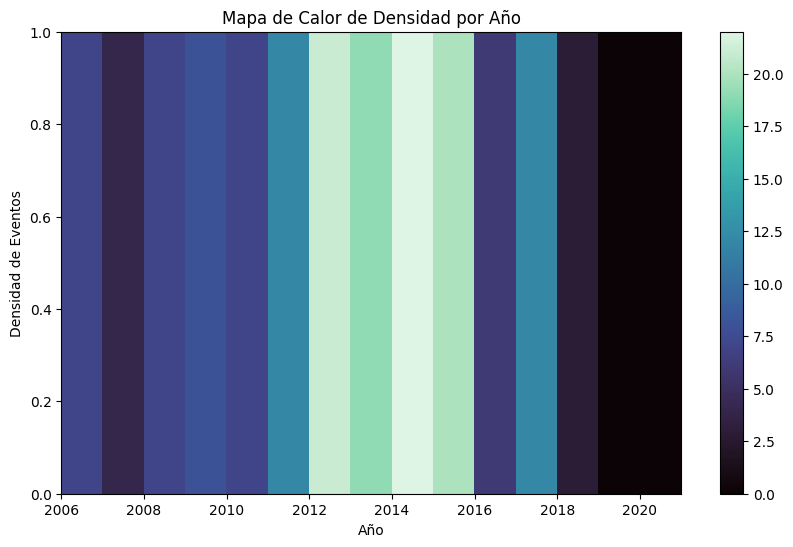

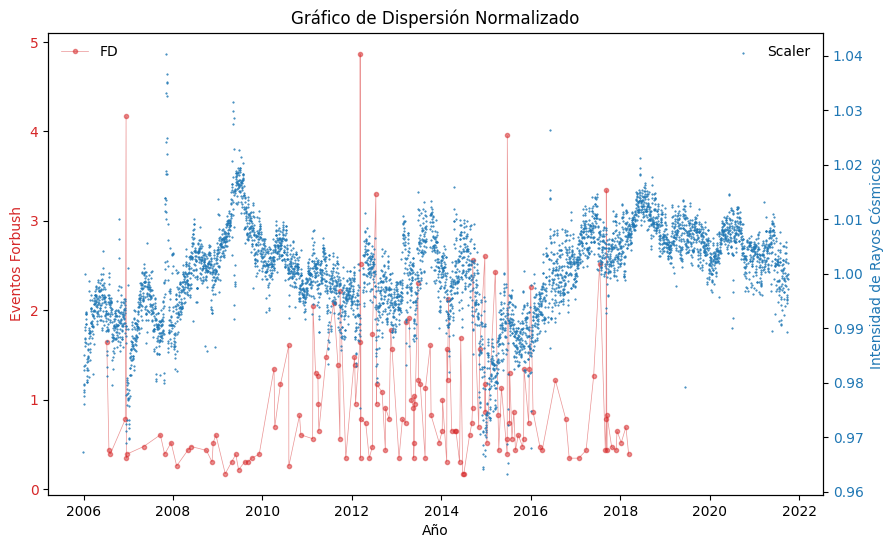

In [26]:
import matplotlib.pyplot as plt
import numpy as np
##############      INTENTO DE MAPA DE COLOR


yearsFD = date_auger_FD.year #check
# Calcula la densidad de eventos por año
density_data, xedges = np.histogram(yearsFD, bins=range(2006, 2022))#check
density_data = density_data.reshape(1, -1)#check

# Crea un colormap de color degradado para representar la densidad
cmap = plt.get_cmap('mako')  # Puedes cambiar 'viridis' por otro colormap de tu elección #check

# Crear una figura para el mapa de calor
fig_heatmap, ax_heatmap = plt.subplots(figsize=(10, 6))

# Crea el mapa de calor en el fondo
im = ax_heatmap.imshow(density_data, cmap=cmap, extent=[xedges[0], xedges[-1], 0, 1], aspect='auto', vmin=0, vmax=np.max(density_data))

# Agrega una barra de color para mostrar la correspondencia entre colores y densidad
cbar = fig_heatmap.colorbar(im)

# Configura etiquetas y título para el mapa de calor
ax_heatmap.set_xlabel('Año')
ax_heatmap.set_ylabel('Densidad de Eventos')
ax_heatmap.set_title('Mapa de Calor de Densidad por Año')

##############      GRÁFICA DE DISPERSIÓN
# Crear una figura para la gráfica de dispersión
fig, ax1 = plt.subplots(figsize=(10, 6))

# Configurar el primer eje Y (izquierdo)
color = 'tab:red'
ax1.set_xlabel('Año')
ax1.set_ylabel('Eventos Forbush', color=color)
ax1.plot(date_auger_FD, FD, color=color, marker='.', label='FD', linewidth=0.5, alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Intensidad de Rayos Cósmicos', color=color)
ax2.scatter(date_auger_CRI, scaler, color=color, marker='.', label='Scaler', s=1)
ax2.tick_params(axis='y', labelcolor=color)

# Configurar etiquetas y título para la gráfica de dispersión
plt.title('Gráfico de Dispersión Normalizado')

# Agregar leyendas
ax1.legend(loc='upper left', frameon=False)
ax2.legend(loc='upper right', frameon=False)

# Mostrar ambas figuras
plt.show()


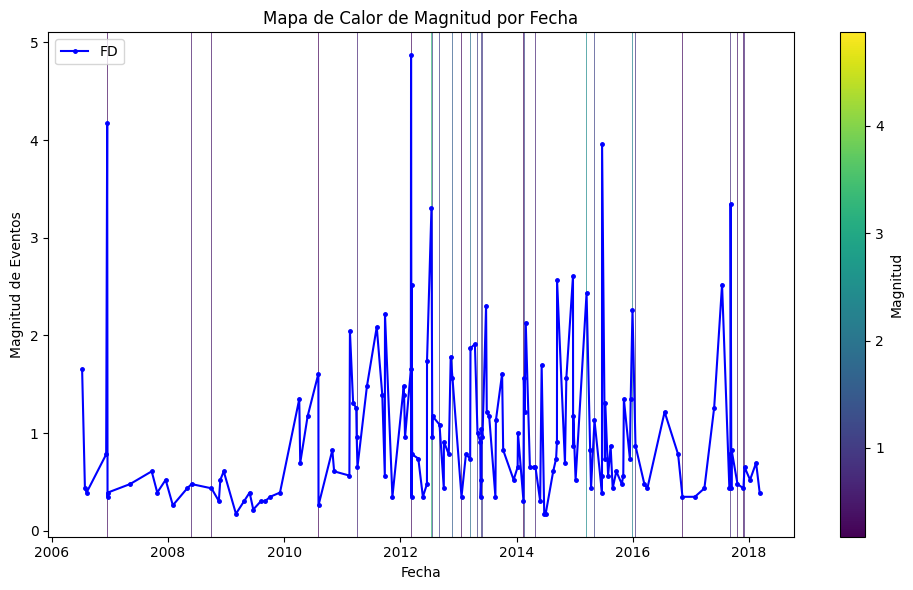

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import datetime


# Normaliza tus valores de FD a un rango de 0 a 1 para definir los colores
norm = plt.Normalize(vmin=min(FD), vmax=max(FD))

# Elige un colormap (puedes cambiar 'viridis' a otro de tu elección)
cmap = plt.get_cmap('viridis')

# Colores para cada valor de FD
colors = [cmap(norm(value)) for value in FD]

# Crea la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Convierte las fechas en valores numéricos
date_num = mdates.date2num(date_auger_FD)

# Configura el fondo de color con los colores de magnitud
for i, date in enumerate(date_num):
    ax.axvspan(date - 0.5, date + 0.5, facecolor=colors[i], alpha=0.7)

# Grafica tus datos
ax.plot(date_auger_FD, FD, marker='.', linestyle='-', color='b', label='FD', markersize=5)

# Configura etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('Magnitud de Eventos')
ax.set_title('Mapa de Calor de Magnitud por Fecha')

# Agrega una barra de color para mostrar la correspondencia entre colores y magnitud
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Magnitud')

# Muestra la leyenda y el gráfico
ax.legend()
plt.tight_layout()
plt.show()


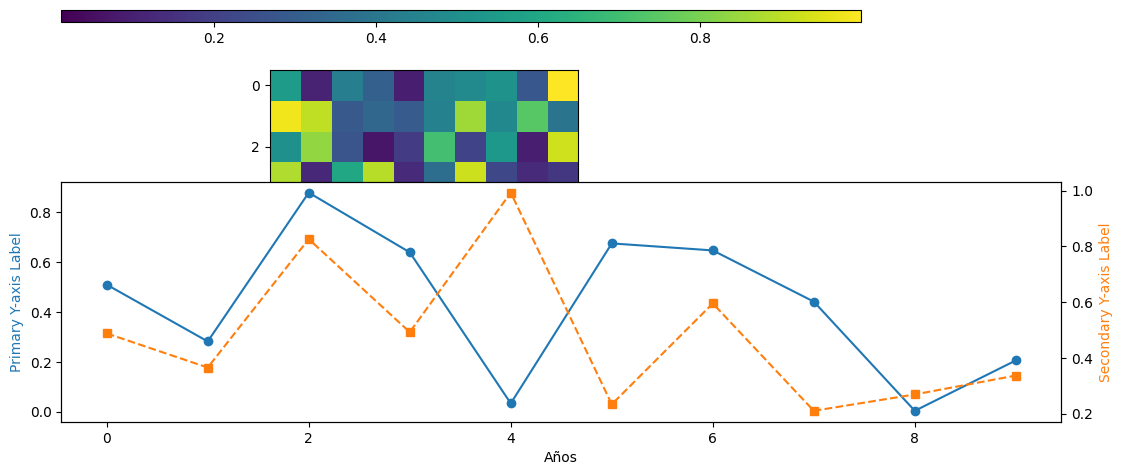

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Datos para el heatmap (reemplaza con tus propios datos)
heatmap_data = np.random.rand(10, 10)  # Ejemplo de datos

# Datos para el gráfico de dispersión (reemplaza con tus propios datos)
x = np.arange(10)
y = np.random.rand(10)  # Ejemplo de datos

# Crear una figura y ejes para el heatmap
fig, ax_heatmap = plt.subplots(figsize=(10, 4))
cax = fig.add_axes([0.15,1.0, 0.8, 0.03])  # Posición de la colorbar

# Configurar el mapa de calor
cmap = plt.get_cmap('viridis')  # Colormap de ejemplo, puedes cambiarlo
heatmap = ax_heatmap.imshow(heatmap_data, cmap=cmap)
fig.colorbar(heatmap, cax=cax, orientation='horizontal', label='')

# Crear una figura y ejes para el gráfico de dispersión
ax_scatter = fig.add_axes([0.15, 0.0, 1.0, 0.6])  # Posición para el gráfico de dispersión

# Configurar el gráfico de dispersión en el eje principal
ax_scatter.plot(x, y, marker='o', linestyle='-')

# Crear un segundo eje Y (derecho) para el gráfico de dispersión
ax2 = ax_scatter.twinx()

# Configurar el segundo eje Y (derecho) con tus propios datos
y2 = np.random.rand(10)  # Ejemplo de datos en el segundo eje Y
ax2.plot(x, y2, marker='s', linestyle='--', color='tab:orange', label='Scatter Data 2')

# Añadir etiquetas y título
ax_scatter.set_xlabel('Años')
ax_scatter.set_ylabel('Primary Y-axis Label', color='tab:blue')
ax2.set_ylabel('Secondary Y-axis Label', color='tab:orange')

# Mostrar el gráfico
plt.title('')
plt.show()


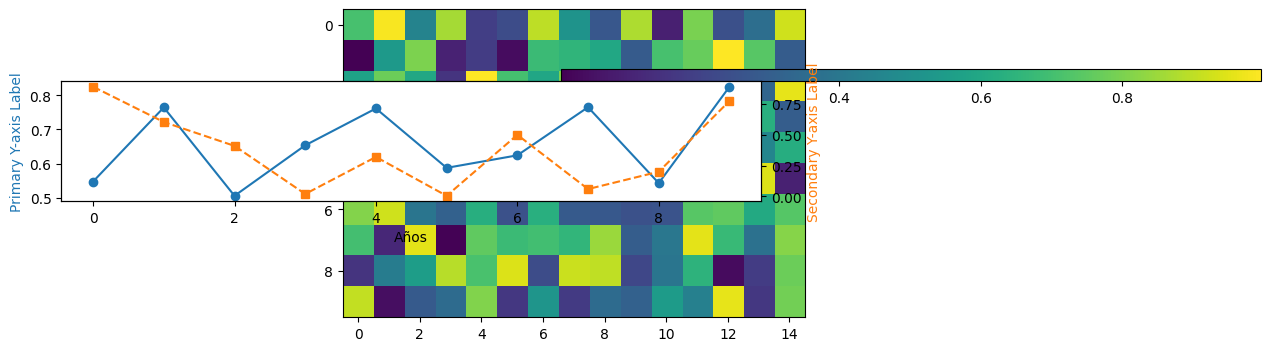

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Datos para el heatmap (reemplaza con tus propios datos)
heatmap_data = np.random.rand(10, 15)  # Ejemplo de datos (10 filas, 15 columnas)

# Datos para el gráfico de dispersión (reemplaza con tus propios datos)
x = np.arange(10)
y = np.random.rand(10)  # Ejemplo de datos

# Crear una figura y ejes para el heatmap
fig, ax_heatmap = plt.subplots(figsize=(10, 4))
cax = fig.add_axes([0.5, 0.7, 0.7, 0.03])  # Posición de la colorbar

# Configurar el mapa de calor
cmap = plt.get_cmap('viridis')  # Colormap de ejemplo, puedes cambiarlo
heatmap = ax_heatmap.imshow(heatmap_data, cmap=cmap)
fig.colorbar(heatmap, cax=cax, orientation='horizontal', label='')

# Crear una figura y ejes para el gráfico de dispersión
ax_scatter = fig.add_axes([0.0, 0.4, 0.7, 0.3])  # Posición para el gráfico de dispersión

# Configurar el gráfico de dispersión en el eje principal
ax_scatter.plot(x, y, marker='o', linestyle='-')

# Crear un segundo eje Y (derecho) para el gráfico de dispersión
ax2 = ax_scatter.twinx()

# Configurar el segundo eje Y (derecho) con tus propios datos
y2 = np.random.rand(10)  # Ejemplo de datos en el segundo eje Y
ax2.plot(x, y2, marker='s', linestyle='--', color='tab:orange', label='Scatter Data 2')

# Añadir etiquetas y título
ax_scatter.set_xlabel('Años')
ax_scatter.set_ylabel('Primary Y-axis Label', color='tab:blue')
ax2.set_ylabel('Secondary Y-axis Label', color='tab:orange')

# Mostrar el gráfico
plt.title('')
plt.show()

